In [2]:
#pip install seaborn

In [2]:
# Basic libraries
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing & ML
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Version check
#import sys
#print("Python version:", sys.version)
#print("Pandas version:", pd.__version__)

In [4]:
col_names = [
    'duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes',
    'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins',
    'logged_in', 'num_compromised', 'root_shell', 'su_attempted',
    'num_root', 'num_file_creations', 'num_shells', 'num_access_files',
    'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count',
    'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate',
    'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate',
    'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count',
    'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
    'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate',
    'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
    'dst_host_srv_rerror_rate', 'label', 'difficulty_level'
]

# Load training dataset
train_path = "data/KDDTrain+.txt"
df_train = pd.read_csv(train_path,names=col_names)

# Display basic info
#print("Training data shape:", df_train.shape)
df_train.head()


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,difficulty_level
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [6]:
print("Missing values in training set:", df_train.isnull().sum().sum())
# Check class balance
print("\nClass distribution:")
print(df_train['label'].value_counts())
print("\nUnique protocol types:", df_train['protocol_type'].unique())
print("Unique services:", len(df_train['service'].unique()))
print("Unique flags:", df_train['flag'].unique())

Missing values in training set: 0

Class distribution:
label
normal             67343
neptune            41214
satan               3633
ipsweep             3599
portsweep           2931
smurf               2646
nmap                1493
back                 956
teardrop             892
warezclient          890
pod                  201
guess_passwd          53
buffer_overflow       30
warezmaster           20
land                  18
imap                  11
rootkit               10
loadmodule             9
ftp_write              8
multihop               7
phf                    4
perl                   3
spy                    2
Name: count, dtype: int64

Unique protocol types: ['tcp' 'udp' 'icmp']
Unique services: 70
Unique flags: ['SF' 'S0' 'REJ' 'RSTR' 'SH' 'RSTO' 'S1' 'RSTOS0' 'S3' 'S2' 'OTH']


In [8]:
# Convert labels to binary classification: 'attack' vs 'normal'
df_train['label'] = df_train['label'].apply(lambda x: 'normal' if x == 'normal' else 'attack')
df_train['label'].value_counts()

label
normal    67343
attack    58630
Name: count, dtype: int64

In [10]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
import joblib

categorical_cols = ['protocol_type', 'service', 'flag']
encoders = {}

# Encode each categorical column with a separate LabelEncoder
for col in categorical_cols:
    le = LabelEncoder()
    df_train[col] = le.fit_transform(df_train[col])
    encoders[col] = le  # Save encoder for later use


In [12]:
df_train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,difficulty_level
0,0,1,20,9,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,2,44,9,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,1,49,5,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,attack,19
3,0,1,24,9,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,1,24,9,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


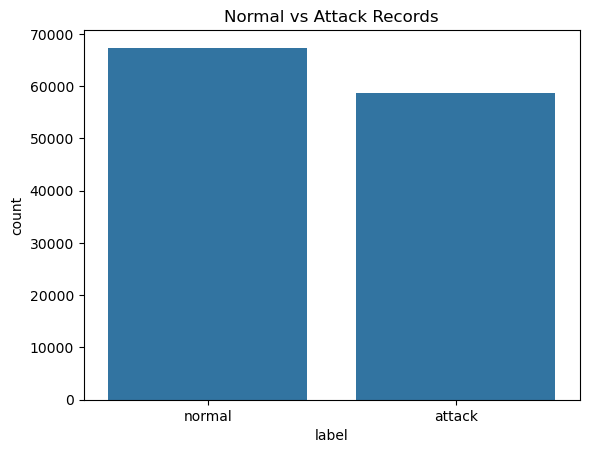

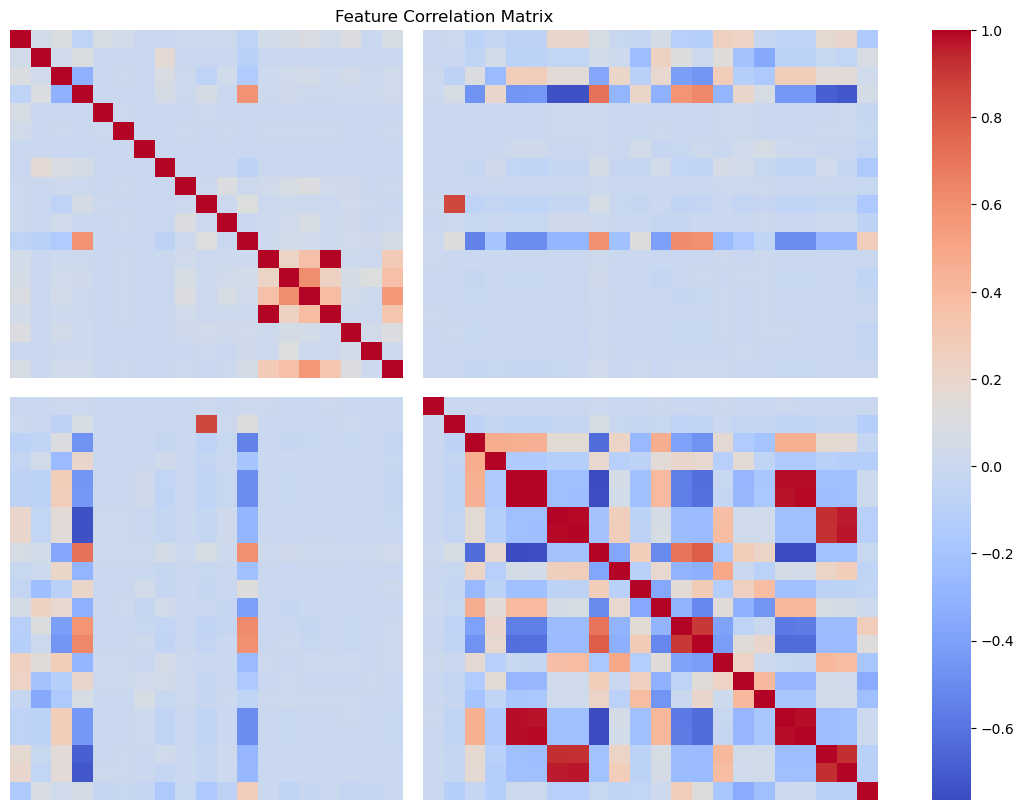

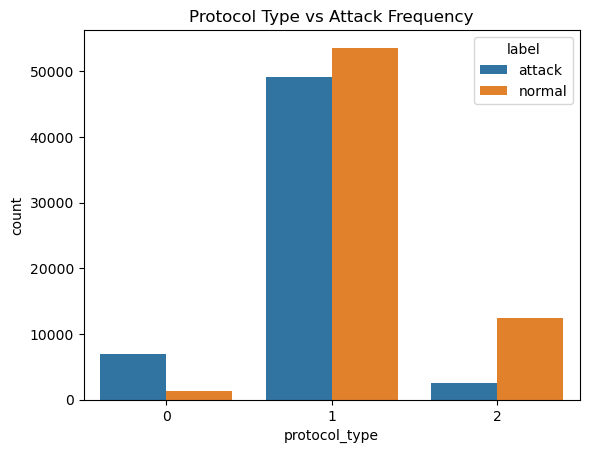

In [14]:
#Exploratory Data Analysis (EDA)
# Class distribution
sns.countplot(data=df_train, x='label')
plt.title('Normal vs Attack Records')
plt.show()

# Correlation matrix
plt.figure(figsize=(14, 10))
numeric_df = df_train.select_dtypes(include=[np.number])
corr = numeric_df.corr()
sns.heatmap(corr, cmap="coolwarm", xticklabels=False, yticklabels=False)
plt.title('Feature Correlation Matrix')
plt.show()

# Example: protocol vs attack count
sns.countplot(data=df_train, x='protocol_type', hue='label')
plt.title("Protocol Type vs Attack Frequency")
plt.show()

In [16]:
# Split features and label
X = df_train.drop('label', axis=1)
y = df_train['label']

# Encode label: 'normal' -> 1, 'attack' -> 0
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [18]:
print(X_scaled)
X.head()

[[-0.11024922 -0.12470616 -0.68678521 ... -0.22453241 -0.37638703
   0.21642633]
 [-0.11024922  2.21931185  0.78142753 ... -0.38763462 -0.37638703
  -1.9655564 ]
 [-0.11024922 -0.12470616  1.08730518 ... -0.38763462 -0.37638703
  -0.21997022]
 ...
 [-0.11024922 -0.12470616  1.39318283 ... -0.35501418 -0.37638703
  -0.65636676]
 [-0.11024922 -0.12470616 -0.0750299  ... -0.38763462 -0.37638703
   0.21642633]
 [-0.11024922 -0.12470616 -0.68678521 ... -0.38763462 -0.37638703
   0.65282288]]


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,difficulty_level
0,0,1,20,9,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,20
1,0,2,44,9,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,15
2,0,1,49,5,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,19
3,0,1,24,9,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,21
4,0,1,24,9,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,21


In [20]:
# Split dataset: 80% training, 20% validation
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, stratify=y, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (100778, 42)
X_test shape: (25195, 42)
y_train shape: (100778,)
y_test shape: (25195,)


In [22]:
print(X_train)


[[-0.11024922 -0.12470616  1.08730518 ... -0.38763462 -0.37638703
  -0.21997022]
 [-0.10986527 -0.12470616 -0.74796074 ... -0.15929153 -0.37638703
  -6.76591841]
 [-0.11024922 -0.12470616 -0.44208309 ... -0.38763462 -0.37638703
   0.65282288]
 ...
 [-0.10832947 -0.12470616  1.39318283 ... -0.38763462 -0.37638703
   0.65282288]
 [-0.11024922 -2.46872416 -1.05383839 ... -0.38763462 -0.37638703
  -1.09276331]
 [-0.11024922 -0.12470616 -0.44208309 ... -0.19191197 -0.18856898
  -1.9655564 ]]


In [24]:
#Save Processed Data (Optional)
# Create processed data directory
import os
os.makedirs("data/processed", exist_ok=True)

# Save train/val splits
pd.DataFrame(X_train).to_csv("data/processed/X_train.csv", index=False)
pd.DataFrame(X_test).to_csv("data/processed/X_val.csv", index=False)
pd.DataFrame(y_train).to_csv("data/processed/y_train.csv", index=False)
pd.DataFrame(y_test).to_csv("data/processed/y_val.csv", index=False)

/var/folders/1h/5wjmd2p914v2_m3l36t9p6mm0000gn/T/ipykernel_2178/2160481298.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y, palette="Set2")


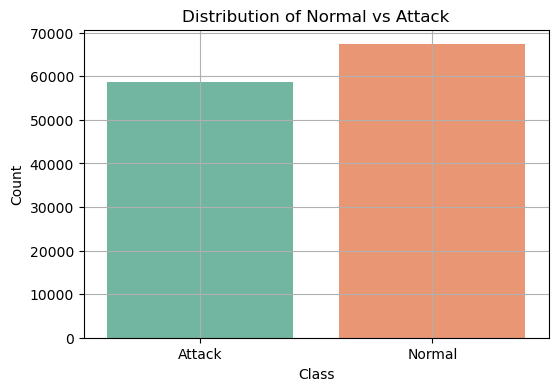

In [25]:
# EDA: Class Distribution
# Visualize label distribution
plt.figure(figsize=(6,4))
sns.countplot(x=y, palette="Set2")
plt.title("Distribution of Normal vs Attack")
plt.xticks([0, 1], ['Attack', 'Normal'])
plt.xlabel("Class")
plt.ylabel("Count")
plt.grid(True)
plt.show()

/var/folders/1h/5wjmd2p914v2_m3l36t9p6mm0000gn/T/ipykernel_2178/414100411.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_train['protocol_type'], order=df_train['protocol_type'].value_counts().index, palette='Pastel1')


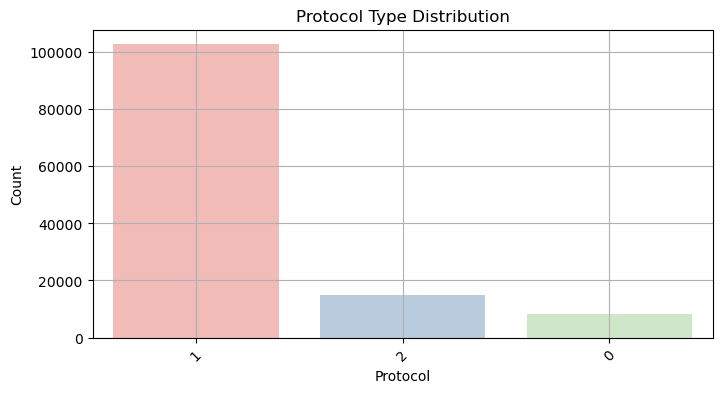

/var/folders/1h/5wjmd2p914v2_m3l36t9p6mm0000gn/T/ipykernel_2178/414100411.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_train[df_train['service'].isin(top_services)]['service'], palette='Set3')


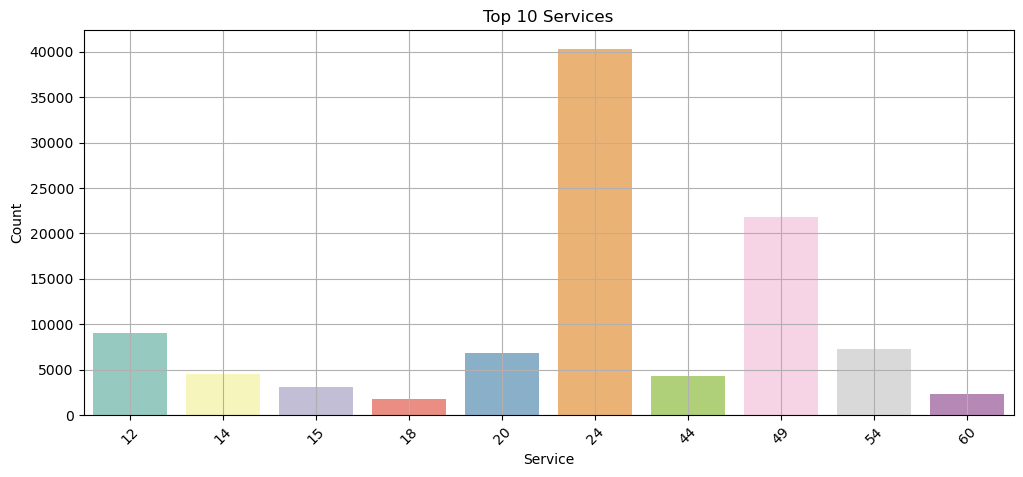

In [26]:
# Visualize protocol types
plt.figure(figsize=(8,4))
sns.countplot(x=df_train['protocol_type'], order=df_train['protocol_type'].value_counts().index, palette='Pastel1')
plt.title("Protocol Type Distribution")
plt.xlabel("Protocol")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Visualize services (top 10)
plt.figure(figsize=(12,5))
top_services = df_train['service'].value_counts().nlargest(10).index
sns.countplot(x=df_train[df_train['service'].isin(top_services)]['service'], palette='Set3')
plt.title("Top 10 Services")
plt.xlabel("Service")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

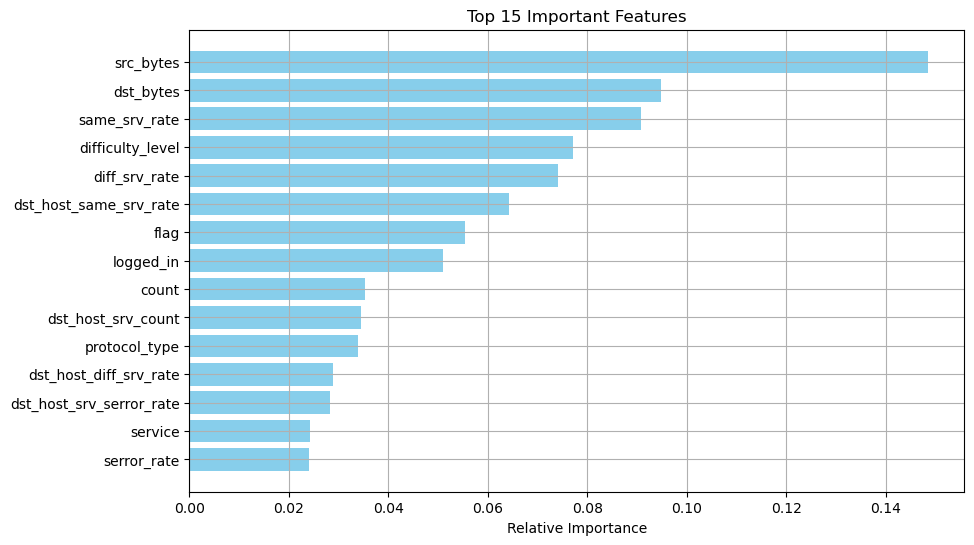

In [30]:
#Feature Selection: Tree-based Feature Importance
from sklearn.ensemble import RandomForestClassifier

# Use random forest to get feature importance
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

importances = model.feature_importances_
indices = np.argsort(importances)[-15:]  # top 15 important features

# Plot top features
plt.figure(figsize=(10,6))
plt.title("Top 15 Important Features")
plt.barh(range(len(indices)), importances[indices], color='skyblue')
plt.yticks(range(len(indices)), [X.columns[i] for i in indices])
plt.xlabel("Relative Importance")
plt.grid(True)
plt.show()

In [31]:
from sklearn.feature_selection import SelectKBest, f_classif

# Select top 20 best features based on ANOVA F-value
selector = SelectKBest(score_func=f_classif, k=20)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Get selected feature names
selected_features = X.columns[selector.get_support()].tolist()
print("Selected Features:", selected_features)

Selected Features: ['protocol_type', 'service', 'flag', 'logged_in', 'count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'difficulty_level']


/opt/anaconda3/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [19] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


In [34]:
#Save Reduced Feature Datasets

# Save selected feature data
os.makedirs("data/reduced", exist_ok=True)

pd.DataFrame(X_train_selected, columns=selected_features).to_csv("data/reduced/X_train_selected.csv", index=False)
pd.DataFrame(X_test_selected, columns=selected_features).to_csv("data/reduced/X_val_selected.csv", index=False)
pd.DataFrame(y_train).to_csv("data/reduced/y_train.csv", index=False)
pd.DataFrame(y_test).to_csv("data/reduced/y_val.csv", index=False)

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import joblib  # for saving models

In [38]:
X_trainNEW = pd.read_csv("data/processed/X_train.csv")
X_valNEW = pd.read_csv("data/processed/X_val.csv")
y_trainNEW = pd.read_csv("data/processed/y_train.csv").values.ravel()
y_valNEW = pd.read_csv("data/processed/y_val.csv").values.ravel()

In [40]:
#Define Helper Function for Evaluation

def evaluate_model(name, y_true, y_pred):
    print(f"🔍 Evaluation for {name}")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Classification Report:\n", classification_report(y_true, y_pred))
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

🔍 Evaluation for Logistic Regression
Accuracy: 0.9775749156578686
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.98     11726
           1       0.98      0.98      0.98     13469

    accuracy                           0.98     25195
   macro avg       0.98      0.98      0.98     25195
weighted avg       0.98      0.98      0.98     25195



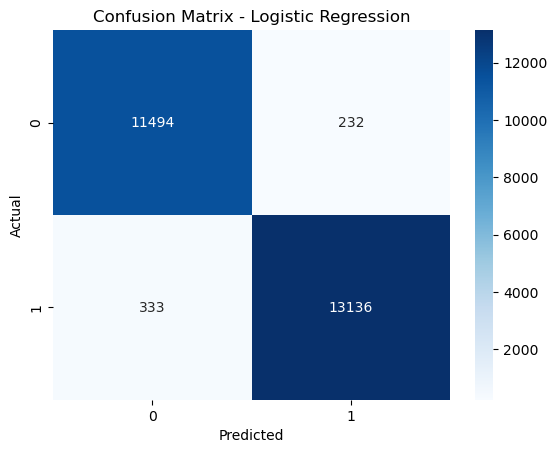

In [42]:
#Train Logistic Regression
# Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_trainNEW, y_trainNEW)
y_pred_lr = lr.predict(X_valNEW)
evaluate_model("Logistic Regression", y_valNEW, y_pred_lr)

🔍 Evaluation for Support Vector Machine
Accuracy: 0.9966660051597539
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00     11726
           1       1.00      1.00      1.00     13469

    accuracy                           1.00     25195
   macro avg       1.00      1.00      1.00     25195
weighted avg       1.00      1.00      1.00     25195



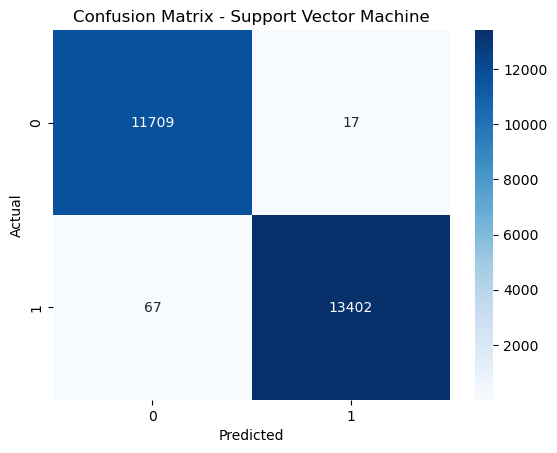

In [44]:
#Train Support Vector Machine (SVM)
# SVM
svm = SVC(kernel='rbf')
svm.fit(X_trainNEW, y_trainNEW)
y_pred_svm = svm.predict(X_valNEW)
evaluate_model("Support Vector Machine", y_valNEW, y_pred_svm)

🔍 Evaluation for Random Forest
Accuracy: 0.9998412383409406
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     11726
           1       1.00      1.00      1.00     13469

    accuracy                           1.00     25195
   macro avg       1.00      1.00      1.00     25195
weighted avg       1.00      1.00      1.00     25195



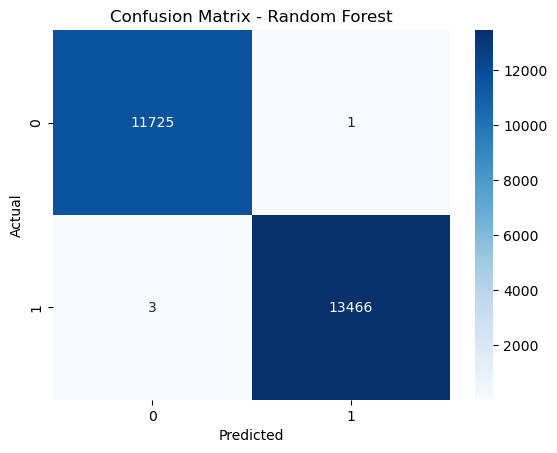

In [45]:
#Train Random Forest
# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_trainNEW, y_trainNEW)
y_pred_rf = rf.predict(X_valNEW)
evaluate_model("Random Forest", y_valNEW, y_pred_rf)

In [46]:
#Save Best Model (Optional)
# Save model (example: Random Forest)
joblib.dump(rf, "data/processed/best_model_rf.pkl")
print("✅ Random Forest model saved successfully.")

✅ Random Forest model saved successfully.


In [52]:
#pip install tensorflow

In [54]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [56]:
X_trainNEW = pd.read_csv("data/processed/X_train.csv")
X_valNEW = pd.read_csv("data/processed/X_val.csv")
y_trainNEW = pd.read_csv("data/processed/y_train.csv").values.ravel()
y_valNEW = pd.read_csv("data/processed/y_val.csv").values.ravel()

In [58]:
#Build ANN Model
# Define ANN model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')  # Binary classification
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         2,752 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,865 (19.00 KB)

 Trainable params: 4,865 (19.00 KB)

 Non-trainable params: 0 (0.00 B)

In [60]:
#Train ANN Model
# Early stopping to avoid overfitting
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(X_trainNEW, y_trainNEW,
                    epochs=50,
                    batch_size=64,
                    validation_data=(X_valNEW, y_valNEW),
                    callbacks=[early_stop],
                    verbose=1)


Epoch 1/50
1575/1575 ━━━━━━━━━━━━━━━━━━━━ 1s 394us/step - accuracy: 0.9507 - loss: 0.1307 - val_accuracy: 0.9941 - val_loss: 0.0179
Epoch 2/50
1575/1575 ━━━━━━━━━━━━━━━━━━━━ 1s 365us/step - accuracy: 0.9930 - loss: 0.0255 - val_accuracy: 0.9950 - val_loss: 0.0131
Epoch 3/50
1575/1575 ━━━━━━━━━━━━━━━━━━━━ 1s 365us/step - accuracy: 0.9944 - loss: 0.0162 - val_accuracy: 0.9962 - val_loss: 0.0105
Epoch 4/50
1575/1575 ━━━━━━━━━━━━━━━━━━━━ 1s 366us/step - accuracy: 0.9952 - loss: 0.0140 - val_accuracy: 0.9966 - val_loss: 0.0093
Epoch 5/50
1575/1575 ━━━━━━━━━━━━━━━━━━━━ 1s 365us/step - accuracy: 0.9956 - loss: 0.0110 - val_accuracy: 0.9968 - val_loss: 0.0080
Epoch 6/50
1575/1575 ━━━━━━━━━━━━━━━━━━━━ 1s 366us/step - accuracy: 0.9960 - loss: 0.0103 - val_accuracy: 0.9974 - val_loss: 0.0076
Epoch 7/50
1575/1575 ━━━━━━━━━━━━━━━━━━━━ 1s 365us/step - accuracy: 0.9964 - loss: 0.0092 - val_accuracy: 0.9967 - val_loss: 0.0079
Epoch 8/50
1575/1575 ━━━━━━━━━━━━━━━━━━━━ 1s 366us/step - accuracy: 0.9965 -

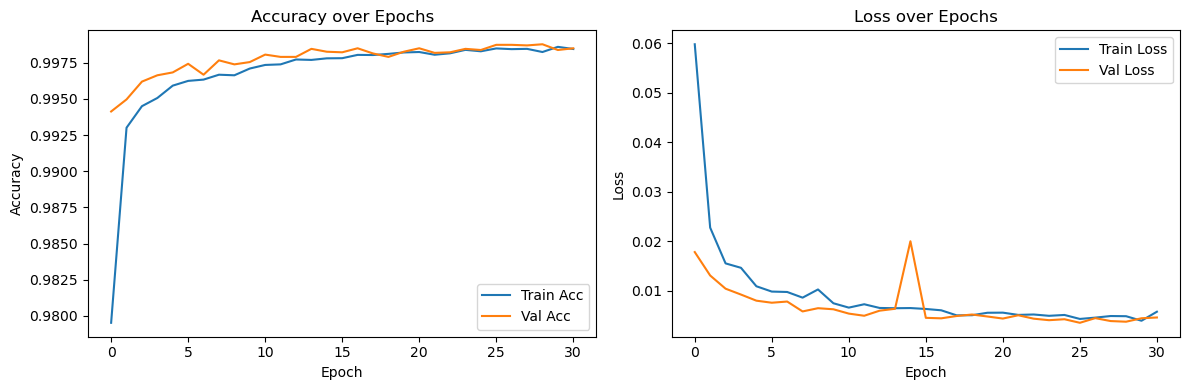

In [62]:
#Visualize Training
# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()

788/788 ━━━━━━━━━━━━━━━━━━━━ 0s 168us/step
Accuracy: 0.9987299067275253
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     11726
           1       1.00      1.00      1.00     13469

    accuracy                           1.00     25195
   macro avg       1.00      1.00      1.00     25195
weighted avg       1.00      1.00      1.00     25195



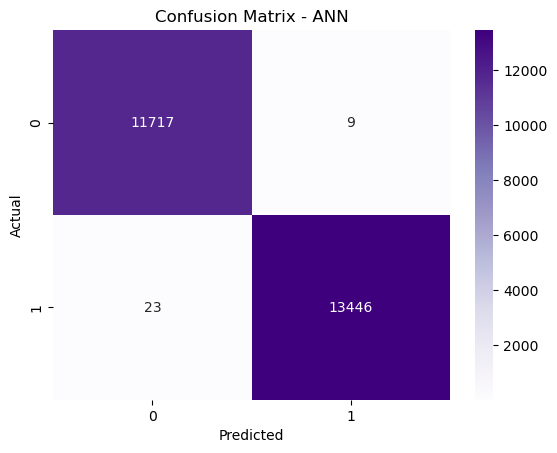

In [64]:
#Evaluate Model
# Predictions
y_pred_ann = (model.predict(X_valNEW) > 0.5).astype("int32")

# Metrics
print("Accuracy:", accuracy_score(y_valNEW, y_pred_ann))
print("Classification Report:\n", classification_report(y_valNEW, y_pred_ann))

# Confusion matrix
cm = confusion_matrix(y_valNEW, y_pred_ann)
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples')
plt.title("Confusion Matrix - ANN")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [66]:
#Save ANN Model
# Save the model
model.save("data/processed/ann_model.h5")
print("✅ ANN model saved as ann_model.h5")

✅ ANN model saved as ann_model.h5


In [68]:
from tensorflow.keras.models import load_model

In [70]:
X_trainNEW = pd.read_csv("data/processed/X_train.csv")
X_valNEW = pd.read_csv("data/processed/X_val.csv")
y_trainNEW = pd.read_csv("data/processed/y_train.csv").values.ravel()
y_valNEW = pd.read_csv("data/processed/y_val.csv").values.ravel()

In [72]:
#Train Classical Models Again (For Consistency)
# Logistic Regression
log_clf = LogisticRegression(max_iter=1000)
log_clf.fit(X_trainNEW, y_trainNEW)
log_preds = log_clf.predict(X_valNEW)

# Random Forest
rf_clf = RandomForestClassifier(n_estimators=100)
rf_clf.fit(X_trainNEW, y_trainNEW)
rf_preds = rf_clf.predict(X_valNEW)

# SVM
svm_clf = SVC()
svm_clf.fit(X_trainNEW, y_trainNEW)
svm_preds = svm_clf.predict(X_valNEW)

In [73]:
# Load previously trained ANN model
ann_model = load_model("data/processed/ann_model.h5")
ann_preds = (ann_model.predict(X_valNEW) > 0.5).astype("int32").flatten()

788/788 ━━━━━━━━━━━━━━━━━━━━ 0s 159us/step



=== Logistic Regression ===
Accuracy: 0.9775749156578686
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.98     11726
           1       0.98      0.98      0.98     13469

    accuracy                           0.98     25195
   macro avg       0.98      0.98      0.98     25195
weighted avg       0.98      0.98      0.98     25195



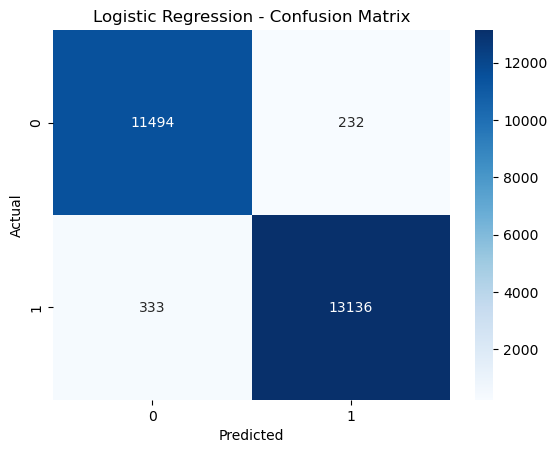


=== Random Forest ===
Accuracy: 0.9998412383409406
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     11726
           1       1.00      1.00      1.00     13469

    accuracy                           1.00     25195
   macro avg       1.00      1.00      1.00     25195
weighted avg       1.00      1.00      1.00     25195



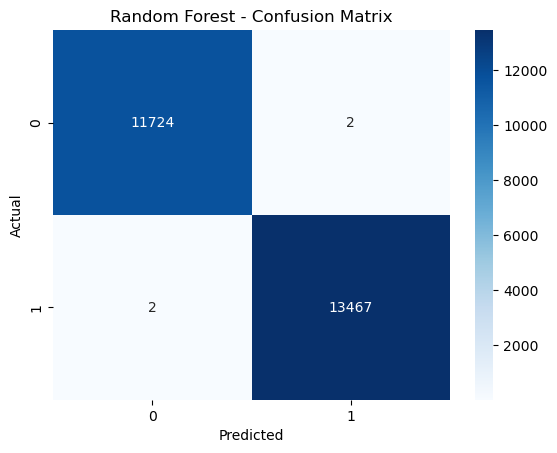


=== SVM ===
Accuracy: 0.9966660051597539
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00     11726
           1       1.00      1.00      1.00     13469

    accuracy                           1.00     25195
   macro avg       1.00      1.00      1.00     25195
weighted avg       1.00      1.00      1.00     25195



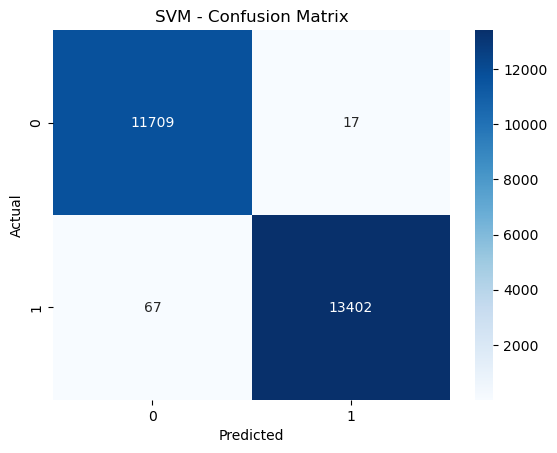


=== ANN ===
Accuracy: 0.9987299067275253
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     11726
           1       1.00      1.00      1.00     13469

    accuracy                           1.00     25195
   macro avg       1.00      1.00      1.00     25195
weighted avg       1.00      1.00      1.00     25195



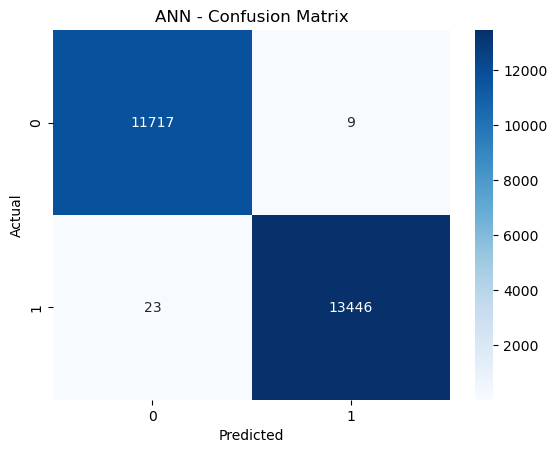

In [74]:
#Evaluate All Models
models = {
    'Logistic Regression': log_preds,
    'Random Forest': rf_preds,
    'SVM': svm_preds,
    'ANN': ann_preds
}

for name, preds in models.items():
    print(f"\n=== {name} ===")
    print("Accuracy:", accuracy_score(y_valNEW, preds))
    print("Classification Report:\n", classification_report(y_valNEW, preds))

    cm = confusion_matrix(y_valNEW, preds)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()


=== Hybrid Voting Model ===
Accuracy: 0.9974598134550506
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00     11726
           1       1.00      1.00      1.00     13469

    accuracy                           1.00     25195
   macro avg       1.00      1.00      1.00     25195
weighted avg       1.00      1.00      1.00     25195



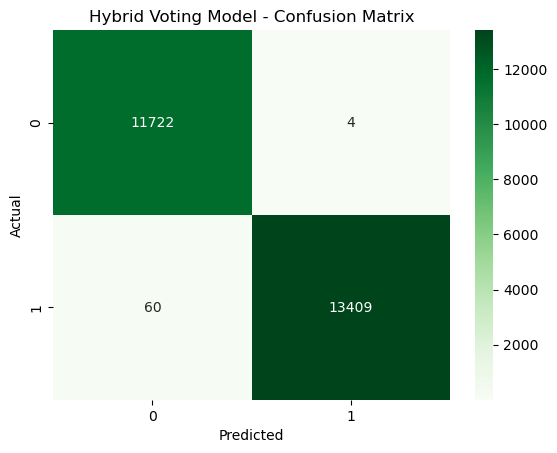

In [78]:
#Optional: Hybrid Voting Model (Simple Majority Vote)
# Simple majority voting ensemble (hybrid model)
import scipy.stats as stats

# Stack predictions from 3 models (excluding ANN or including it)
combined_preds = np.vstack([
    log_preds,
    rf_preds,
    svm_preds,
    ann_preds
])

# Take mode across models (majority voting)
final_preds = stats.mode(combined_preds, axis=0)[0].flatten()

# Evaluate hybrid model
print("\n=== Hybrid Voting Model ===")
print("Accuracy:", accuracy_score(y_valNEW, final_preds))
print("Classification Report:\n", classification_report(y_valNEW, final_preds))

cm = confusion_matrix(y_valNEW, final_preds)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.title("Hybrid Voting Model - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [80]:
# Save the model, scaler, and encoders
joblib.dump(scaler, "data/processed/final_scaler.pkl")
joblib.dump(encoders, "data/processed/final_encoders.pkl")
joblib.dump(label_encoder, "data/processed/final_label_encoder.pkl")
#joblib.dump(model, "data/processed/final_rf_model.pkl")

['data/processed/final_label_encoder.pkl']

In [82]:
#Save Final Selected Model
#Choose one based on best performance.
import joblib

# Save best classical model (say Random Forest or Hybrid)
joblib.dump(rf_clf, "data/processed/final_rf_model.pkl")
print("✅ Final Random Forest model saved.")

✅ Final Random Forest model saved.
